<a href="https://colab.research.google.com/github/farhanwadia/nlp_g14/blob/Geet/p3_TopicModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up notebook


In [91]:
# cloning our Project Repo
# !git clone -b Geet https://github.com/farhanwadia/nlp_g14.git

In [92]:
# %cd nlp_g14/

In [93]:
# ! ls

# Import Libraries


In [94]:
# importing basic python modules that we most probably will be using in the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try: 
  import langdetect
except:
  !pip install langdetect
  import langdetect

# to make sure our plots are inline with the code cells
%matplotlib inline 

# Part 1: Train Model (Part 1's end)

In [95]:
df = pd.read_csv('sentiment_analysis(eng_filtered).csv')
np.random.seed(0)
negative_idx = np.random.choice(df[df['label']==0].index, size = (5000))
positive_idx = np.random.choice(df[df['label']==1].index, size = (5000))
idx = np.concatenate((negative_idx, positive_idx))
ttr_data = df.filter(items = idx, axis = 0).reset_index(drop = True).drop(df.columns[0], axis = 1)
ttr_data

,text,label,language
0,The #Celtics season hasn't started off the way...,0,en
1,And the case for God from our yearning has a m...,0,en
2,what the fuck minseok's jxncnckcxx https://t.c...,0,en
3,#dubchallenge bc why not https://t.co/avn0SecD17,0,en
4,Teeter Hang Ups EP-560 Inversion Table ComforT...,0,en
...,...,...,...
9995,Good morning! Sunny but cool with highs in the...,1,en
9996,extremely thankful for my bffs. Thank you guys...,1,en
9997,Genuine happiness. I love this. https://t.co/x...,1,en
9998,RT @roywolt: please vote me as biggest zen fan...,1,en


In [96]:
# importing required NLTK modules for text processsing
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from bs4 import BeautifulSoup
import re

def PreProcessor(text):
  lemmatizer = WordNetLemmatizer()
  stopword = stopwords.words('english')
  # stopword.extend(['from', 'subject', 're', 'edu', 'use', 'russia', 'ukraine', 'war', 'russian']) ### Added some more stopwords
  text = BeautifulSoup(text, 'html.parser').get_text()
  text = re.sub(r'http\S+', '', text)
  text = re.sub(' +', ' ', text)
  tokens = nltk.word_tokenize(text)
  lower = [word.lower() for word in tokens]
  no_stopwords = [word for word in lower if word not in stopword]
  no_alpha = [word for word in no_stopwords if word.isalpha()]
  lemm_text = [lemmatizer.lemmatize(word) for word in no_alpha]
  normalized_text = lemm_text
  return normalized_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [97]:
# Pre process the data
ttr_data['pre-processed'] = ttr_data['text'].map(PreProcessor)
ttr_data['pre-processed text'] = ttr_data['pre-processed'].apply(lambda x: " ".join([str(word) for word in x]))

c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [98]:
# Split data into training and testing
from sklearn.model_selection import train_test_split

features = ttr_data.drop(columns = ['label'])
target = ttr_data['label']

# our splitting strategy would be 80%-20%, with splits stratified on target classes so that both splits will be balanced
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, stratify = target, random_state = 4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.50, stratify = y_test, random_state = 4)


In [99]:
X_train

,text,language,pre-processed,pre-processed text
4967,Tb to the day I felt like a freaking bomb ass ...,en,"[tb, day, felt, like, freaking, bomb, as, prin...",tb day felt like freaking bomb as princess thr...
8516,Enjoy the day #HappyVeteransday https://t.co/B...,en,"[enjoy, day, happyveteransday]",enjoy day happyveteransday
6486,I'm so proud of you. I love you @camilacabello...,en,"[proud, love, loveonlytee]",proud love loveonlytee
2344,Even water pumps in Arhab poor villagers relay...,en,"[even, water, pump, arhab, poor, villager, rel...",even water pump arhab poor villager relay beca...
5322,Happy birthday to my best friend and my person...,en,"[happy, birthday, best, friend, person, see, f...",happy birthday best friend person see friday
...,...,...,...,...
1907,When your #boss wants you to #suck another guy...,en,"[bos, want, suck, another, guy, ca, suck]",bos want suck another guy ca suck
4927,"@MartinSFP I'm sorry, Martin. https://t.co/cE7...",en,"[martinsfp, sorry, martin]",martinsfp sorry martin
4511,Ol' cranky has done well. https://t.co/yEasuO7yX8,en,"[ol, cranky, done, well]",ol cranky done well
9408,Happy birthday pretty girl ily!💗 https://t.co/...,en,"[happy, birthday, pretty, girl, ily]",happy birthday pretty girl ily


In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

def Vectorize(data, Vectorizer):
  X = Vectorizer.transform(data)
  words = Vectorizer.get_feature_names_out()
  X = pd.DataFrame(X.toarray())
  X.columns = words
  return X

In [101]:
# TF-IDF generation on pre-processed text

Vectorizer = TfidfVectorizer(analyzer = PreProcessor)
# Fitted_Vectorizer = Vectorizer.fit(X_train['text'])
# X_train = Vectorize(X_train['text'], Fitted_Vectorizer)

Fitted_Vectorizer = Vectorizer.fit(X_train['pre-processed text'])
X_train = Vectorize(X_train['pre-processed text'], Fitted_Vectorizer)


In [102]:
# Only keep English Words

from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

def detect_language(word):
  try:
    return detect(word)
  except LangDetectException:
    return None

english_words = [word for word in X_train.columns if detect_language(word) == 'en']
english_words

['aaronspears',
 'abcnetwork',
 'abducted',
 'abort',
 'aborted',
 'abortion',
 'abpmarathon',
 'absolutely',
 'accessory',
 'accomplished',
 'account',
 'accts',
 'accused',
 'aceminseok',
 'achieved',
 'acknowledges',
 'acreativedc',
 'acted',
 'acting',
 'actingdead',
 'action',
 'active',
 'actively',
 'activist',
 'activity',
 'actorleeminho',
 'actually',
 'adcoteschool',
 'addiction',
 'adoptdontshop',
 'advanced',
 'advocating',
 'advocatingasd',
 'aestheticdolls',
 'affected',
 'affection',
 'affirmation',
 'agency',
 'aircraft',
 'aired',
 'aitcofficial',
 'alcoholawareness',
 'aldubnowandthen',
 'aliciakeys',
 'alliflowers',
 'allingtoncrace',
 'allnewsongs',
 'allow',
 'allowed',
 'allowing',
 'allows',
 'allthingshallyu',
 'alpha',
 'alphaomegatour',
 'already',
 'although',
 'altright',
 'altrightmeans',
 'alyssapacheco',
 'americafirst',
 'americanwrestle',
 'americaswhitetable',
 'amount',
 'amreading',
 'amwriting',
 'analhentai',
 'analytics',
 'anchor',
 'andersoncoo

In [103]:
X_train = X_train[english_words]

In [104]:
# Train our Model - from the comprehensive Part 1 code we found the best model and that is used here

from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

best_model = MLPClassifier(random_state = 4, max_iter = 1000, hidden_layer_sizes=[100, 50], activation='relu')
pca = PCA(n_components=1500)
pca.fit(X_train)
best_model.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=[100, 50], max_iter=1000, random_state=4)

# Part 2.1 Scrape Data

Add the scraping data here but, comment it

# Part 2.2 Sentiment Classification

## Reddit Data - Clean and Read

In [105]:
# reddit_data = 'russia_ukraine_reddit_comments.csv'
# reddit_df = pd.read_csv(reddit_data)
# reddit_df.head()

# Reddit Data from Kaggle
reddit_data = 'russian_invasion_of_ukraine.csv'
reddit_df = pd.read_csv(reddit_data)
reddit_df.head()

C:\Users\patel\AppData\Local\Temp\ipykernel_26084\1973000848.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reddit_df = pd.read_csv(reddit_data)


,title,score,id,url,comms_num,created,body,timestamp
0,Live updates: Russians destroy Chernobyl labor...,56,tkjwjl,https://www.washingtonpost.com/politics/live-u...,15.0,1.648003e+09,NaN,2022-03-23 02:34:15
1,Romania Is Handing Out 30 Million Anti-Radiati...,265,tkjqga,https://www.vice.com/amp/en/article/pkpw7b/iod...,22.0,1.648002e+09,NaN,2022-03-23 02:25:07
2,Oil rises towards $116 as EU weighs Russian ban,28,tk1utj,https://www.reuters.com/business/energy/oil-op...,2.0,1.647952e+09,NaN,2022-03-22 12:27:29
3,Russia Sends $66 Million Coupon to Depository ...,44,tk1nlm,https://www.bloomberg.com/news/articles/2022-0...,8.0,1.647951e+09,NaN,2022-03-22 12:17:29
4,Ukraine war latest: Global diesel shortage loo...,31,tk1ky3,https://www.ft.com/content/795b432f-b189-4c91-...,3.0,1.647951e+09,NaN,2022-03-22 12:13:26


In [106]:
#  reddit_df['Date'].value_counts()

reddit_df['timestamp'].value_counts()

2022-09-22 02:54:37    4
2022-03-31 23:00:48    4
2022-04-04 23:18:25    4
2022-07-24 23:46:46    4
2022-05-20 02:03:51    4
                      ..
2022-05-22 01:36:55    1
2022-05-22 01:36:35    1
2022-05-22 01:36:19    1
2022-05-22 01:36:02    1
2022-10-07 12:10:57    1
Name: timestamp, Length: 241722, dtype: int64

In [107]:
type(reddit_df['timestamp'][0])

str

In [108]:
def date_extract(text):
    
    x = str(text).split(" ")
    y = x[0]
    return y

In [109]:
reddit_df['Date'] = reddit_df['timestamp'].map(date_extract)

In [110]:
reddit_df['Date'].unique()

array(['2022-03-23', '2022-03-22', '2022-03-21', '2022-03-24',
       '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28', 'nan',
       '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01',
       '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05',
       '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09',
       '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13',
       '2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17',
       '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21',
       '2022-04-22', '2022-04-23', '2022-04-24', '2022-04-25',
       '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29',
       '2022-04-30', '2022-05-01', '2022-05-02', '2022-05-03',
       '2022-05-04', '2022-05-05', '2022-05-06', '2022-05-07',
       '2022-05-08', '2022-05-09', '2022-05-10', '2022-05-11',
       '2022-05-12', '2022-05-13', '2022-05-14', '2022-05-15',
       '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19',
       '2022-05-20', '2022-05-21', '2022-05-22',

In [111]:
some_values = ['2022-10-07','2022-09-18', '2022-09-19', '2022-09-20', \
               '2022-09-21', '2022-09-22', '2022-08-09', '2022-08-10', \
                '2022-08-11', '2022-08-12', '2022-05-14', '2022-05-15', \
                '2022-05-16', '2022-05-17', '2022-05-18', '2022-03-28', \
                '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01',\
                '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05',\
                '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09',\
                '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13',\
                '2022-04-14', '2022-04-15']

In [112]:
reddit_df = reddit_df.loc[reddit_df['Date'].isin(some_values)]

In [113]:
# red_text_df = reddit_df[['Body', 'Date']].copy(deep=True)

red_text_df = reddit_df[['body']].copy(deep=True)

In [114]:
red_text_df.shape

(46748, 1)

In [115]:
# Check nulls
red_text_df.isnull().sum(axis=0)

body    12637
dtype: int64

In [116]:
red_text_df.dropna(inplace=True)

In [117]:
# Drop Duplicates
# print(red_text_df.info())
# red_text_df.drop_duplicates(subset='Body', inplace=True)
# red_text_df.info()

# Drop Duplicates - Kaggle Reddit
print(red_text_df.info())
red_text_df.drop_duplicates(subset='body', inplace=True)
red_text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34111 entries, 13161 to 253493
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    34111 non-null  object
dtypes: object(1)
memory usage: 533.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33325 entries, 13161 to 253493
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    33325 non-null  object
dtypes: object(1)
memory usage: 520.7+ KB


In [118]:
# Filter to only have english

from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def detect_language(text):
  try:
    return detect(text)
  except:
    return None

# red_text_df['language'] = red_text_df['Body'].apply(detect_language)
# red_text_df.head()

# Kaggle - Reddit
red_text_df['language'] = red_text_df['body'].apply(detect_language)
red_text_df.head()

,body,language
13161,well are those recon dudes in for a shock when...,en
13162,Almost as beautiful as sleeping kitten,et
13163,I hate that you make sense,en
13164,Russian’s just don’t understand that they are ...,en
13165,Good Bot,so


In [119]:
# red_text_df['language'].value_counts()

In [120]:
# df_check = red_text_df[red_text_df['language'] != 'en']
# df_check.head(40)

In [121]:
red_text_df = red_text_df[red_text_df['language'] == 'en']
red_text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31386 entries, 13161 to 253493
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   body      31386 non-null  object
 1   language  31386 non-null  object
dtypes: object(2)
memory usage: 735.6+ KB


c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


(-0.5, 399.5, 199.5, -0.5)

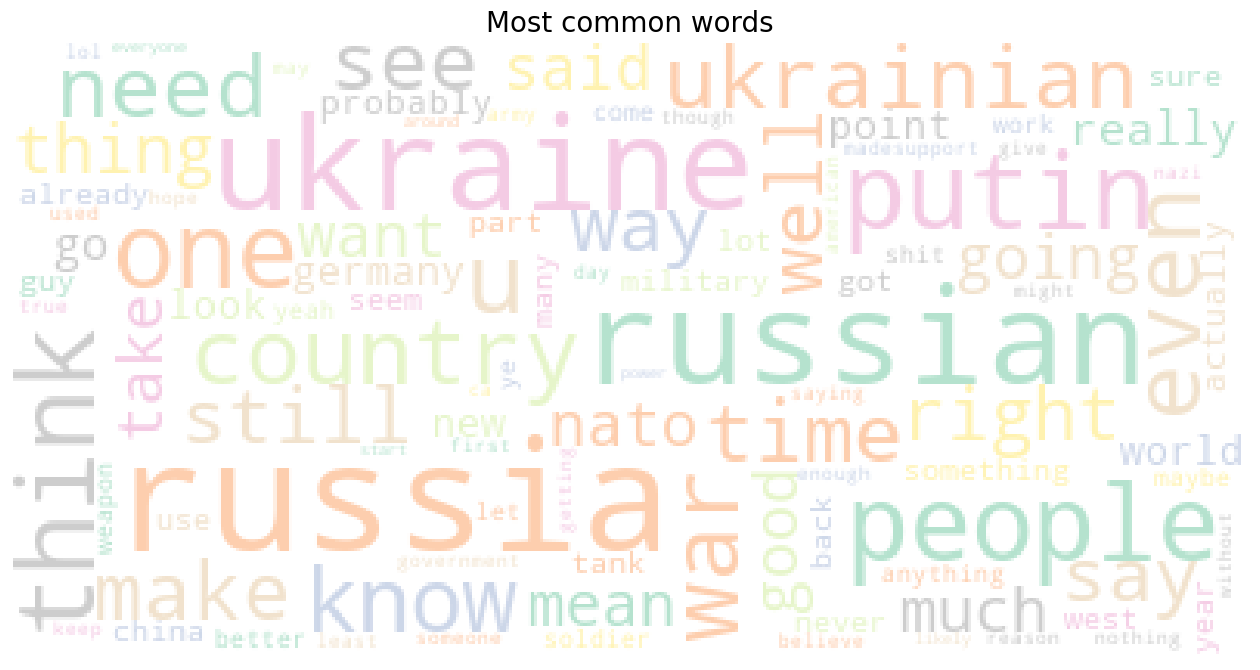

In [122]:
# let's checkput the word cloud of the tweets we have
try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud
# red_text_df['pre-processed'] = red_text_df['Body'].map(PreProcessor)
# red_text_df['pre-processed text'] = red_text_df['pre-processed'].apply(lambda x: " ".join([str(word) for word in x]))
# word_cloud = " ".join(red_text_df['pre-processed text'].values)

# Kaggle - Reddit
red_text_df['pre-processed'] = red_text_df['body'].map(PreProcessor)
red_text_df['pre-processed text'] = red_text_df['pre-processed'].apply(lambda x: " ".join([str(word) for word in x]))
word_cloud = " ".join(red_text_df['pre-processed text'].values)

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

## Reddit Data - Sentiment Classification

In [123]:
# X_test_red = Vectorize(red_text_df['Body'], Fitted_Vectorizer)
# X_test_red = X_test_red[english_words]
# test_pred_red = best_model.predict(X_test_red)  

# Kaggle - Reddit
X_test_red = Vectorize(red_text_df['body'], Fitted_Vectorizer)
X_test_red = X_test_red[english_words]
test_pred_red = best_model.predict(X_test_red)  

c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [124]:
print(test_pred_red.shape)
test_pred_red

(31386,)


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [125]:
positive_idx_red = np.where(test_pred_red==1)[0].tolist()
negative_idx_red = np.where(test_pred_red==0)[0].tolist()

In [126]:
## USE THE MODEL TO GET POSITIVE TEXT & NEGATIVE TEXT
# split = int(red_text_df.shape[0]/2)
# positive = red_text_df.iloc[:split,:]
# negative = red_text_df.iloc[split:,:]

positive_red = red_text_df.iloc[positive_idx_red,:]
negative_red = red_text_df.iloc[negative_idx_red,:]


In [127]:
positive_red.head()

,body,language,pre-processed,pre-processed text
13167,Exactly. Thank you for mentioning dedovshchina...,en,"[exactly, thank, mentioning, dedovshchina, one...",exactly thank mentioning dedovshchina one horr...
13170,So is Putin so it should be a fair matchup.,en,"[putin, fair, matchup]",putin fair matchup
13173,Some period. Some very short period is what I ...,en,"[period, short, period, see]",period short period see
13175,Seems to happen everywhere Russian soldiers go...,en,"[seems, happen, everywhere, russian, soldier, ...",seems happen everywhere russian soldier go nob...
13178,Tell Will Smith that Putin made fun of his wif...,en,"[tell, smith, putin, made, fun, wife, hair, wa...",tell smith putin made fun wife hair war tomorrow


## Twitter Data - Read and Clean

In [128]:
twitter_data = 'Raw_Tweet_Data.csv'
twitter_df = pd.read_csv(twitter_data)
twitter_df.head()

C:\Users\patel\AppData\Local\Temp\ipykernel_26084\4279216409.py:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  twitter_df = pd.read_csv(twitter_data)


,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,0
0,https://twitter.com/NatasaJevtovic/status/1498...,2022-02-27 23:59:43+00:00,Ex-Nato head says #Putin wanted to join allian...,Ex-Nato head says #Putin wanted to join allian...,1498085470374445056,"{'username': 'NatasaJevtovic', 'id': 489482046...",0,0,0,0,...,NaN,"[{'username': 'irismarketiq', 'id': 1471155981...",NaN,NaN,"['Putin', 'Nato', 'RussiaUkraine', 'RussiaUkra...",NaN,{'title': 'Ex-Nato head says Putin wanted to j...,NaN,NaN,NatasaJevtovic
1,https://twitter.com/TheRoostergod/status/14980...,2022-02-27 23:59:38+00:00,I recommend reading about the first &amp; seco...,I recommend reading about the first &amp; seco...,1498085448392007686,"{'username': 'TheRoostergod', 'id': 4050704716...",0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TheRoostergod
2,https://twitter.com/34istanbul571/status/14980...,2022-02-27 23:59:34+00:00,Russia-Ukraine tensions: Latest updates from o...,Russia-Ukraine tensions: Latest updates from o...,1498085431770034176,"{'username': '34istanbul571', 'id': 1451340639...",0,0,0,0,...,NaN,"[{'username': 'YouTube', 'id': 10228272, 'disp...",NaN,NaN,NaN,NaN,{'title': 'Russia-Ukraine tensions: Latest upd...,NaN,NaN,34istanbul571
3,https://twitter.com/yesliaaaa/status/149808541...,2022-02-27 23:59:30+00:00,"Omg, im so sad for him. Happy birthday handsom...","Omg, im so sad for him. Happy birthday handsom...",1498085415055593479,"{'username': 'yesliaaaa', 'id': 494917055, 'di...",0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yesliaaaa
4,https://twitter.com/Pagetamil/status/149808540...,2022-02-27 23:59:27+00:00,Russia-Ukraine crisis: 5ஆம் நாள்: சர்வதேச நீதி...,Russia-Ukraine crisis: 5ஆம் நாள்: சர்வதேச நீதி...,1498085402594484228,"{'username': 'Pagetamil', 'id': 2503036010, 'd...",0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pagetamil


In [129]:
twi_text_df = twitter_df[['renderedContent']].copy(deep=True)

In [130]:
twi_text_df.rename(columns={'renderedContent':'Body'}, inplace=True)

In [131]:
twi_text_df.head()

,Body
0,Ex-Nato head says #Putin wanted to join allian...
1,I recommend reading about the first &amp; seco...
2,Russia-Ukraine tensions: Latest updates from o...
3,"Omg, im so sad for him. Happy birthday handsom..."
4,Russia-Ukraine crisis: 5ஆம் நாள்: சர்வதேச நீதி...


In [132]:
twi_text_df.isnull().sum(axis=0)

Body    0
dtype: int64

In [133]:
# Drop Duplicates
print(twi_text_df.info())
twi_text_df.drop_duplicates(subset='Body', inplace=True)
twi_text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40008 entries, 0 to 40007
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    40008 non-null  object
dtypes: object(1)
memory usage: 312.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38180 entries, 0 to 40007
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    38180 non-null  object
dtypes: object(1)
memory usage: 596.6+ KB


In [134]:
# from langdetect import detect, DetectorFactory
# DetectorFactory.seed = 0

# def detect_language(text):
#   try:
#     return detect(text)
#   except:
#     return None

twi_text_df['language'] = twi_text_df['Body'].apply(detect_language)
twi_text_df.head()

,Body,language
0,Ex-Nato head says #Putin wanted to join allian...,en
1,I recommend reading about the first &amp; seco...,en
2,Russia-Ukraine tensions: Latest updates from o...,en
3,"Omg, im so sad for him. Happy birthday handsom...",en
4,Russia-Ukraine crisis: 5ஆம் நாள்: சர்வதேச நீதி...,ta


In [135]:
twi_text_df = twi_text_df[twi_text_df['language'] == 'en']
twi_text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32772 entries, 0 to 40006
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Body      32772 non-null  object
 1   language  32772 non-null  object
dtypes: object(2)
memory usage: 768.1+ KB


In [136]:
twi_text_df['pre-processed'] = twi_text_df['Body'].map(PreProcessor)
twi_text_df['pre-processed text'] = twi_text_df['pre-processed'].apply(lambda x: " ".join([str(word) for word in x]))

c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


## Twitter Data - Sentiment Classification

In [137]:
X_test_twi = Vectorize(twi_text_df['Body'], Fitted_Vectorizer)
X_test_twi = X_test_twi[english_words]
test_pred_twi = best_model.predict(X_test_twi)  

c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [138]:
test_pred_twi

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [139]:
positive_idx_twi = np.where(test_pred_twi==1)[0].tolist()
negative_idx_twi = np.where(test_pred_twi==0)[0].tolist()

In [140]:
positive_twi = twi_text_df.iloc[positive_idx_twi,:]
negative_twi = twi_text_df.iloc[negative_idx_twi,:]

positive_words_twi = positive_twi['pre-processed'].tolist()
negative_words_twi = negative_twi['pre-processed'].tolist()

## News Data - Read and Clean

In [141]:
news_data = 'russia_ukraine_rss_data.csv'
news_df = pd.read_csv(news_data)
news_df.head()

,title,title_detail,links,link,comments,published,published_parsed,authors,author,author_detail,...,foaf_homepage,rights,rights_detail,href,gd_image,media_thumbnail,thr_total,media_content,media_credit,credit
0,"As NATO Gains New Strength, Moscow Resorts to ...","{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://blogs.prio.org/2023/03/as-nato-gains-n...,https://blogs.prio.org/2023/03/as-nato-gains-n...,"Tue, 28 Mar 2023 09:21:54 +0000","time.struct_time(tm_year=2023, tm_mon=3, tm_md...",[{'name': 'Pavel Baev'}],Pavel Baev,{'name': 'Pavel Baev'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Four Complications for the Rushed Putin-Xi Summit,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://blogs.prio.org/2023/03/four-complicati...,https://blogs.prio.org/2023/03/four-complicati...,"Tue, 21 Mar 2023 08:30:55 +0000","time.struct_time(tm_year=2023, tm_mon=3, tm_md...",[{'name': 'Pavel Baev'}],Pavel Baev,{'name': 'Pavel Baev'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Taiwan Is Feeling the Pressure from Russian an...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://blogs.prio.org/2023/03/taiwan-is-feeli...,https://blogs.prio.org/2023/03/taiwan-is-feeli...,"Mon, 20 Mar 2023 12:39:59 +0000","time.struct_time(tm_year=2023, tm_mon=3, tm_md...",[{'name': 'Pavel Baev'}],Pavel Baev,{'name': 'Pavel Baev'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,China Adjusts Limits on Partnership With Russia,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://blogs.prio.org/2023/03/china-adjusts-l...,https://blogs.prio.org/2023/03/china-adjusts-l...,"Tue, 14 Mar 2023 13:48:34 +0000","time.struct_time(tm_year=2023, tm_mon=3, tm_md...",[{'name': 'Pavel Baev'}],Pavel Baev,{'name': 'Pavel Baev'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Russia-Ukraine War Compels Japan to Reassess C...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://blogs.prio.org/2023/03/russia-ukraine-...,https://blogs.prio.org/2023/03/russia-ukraine-...,"Mon, 06 Mar 2023 14:33:02 +0000","time.struct_time(tm_year=2023, tm_mon=3, tm_md...",[{'name': 'Pavel Baev'}],Pavel Baev,{'name': 'Pavel Baev'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
news_df.shape

(476, 33)

In [143]:
news_text_df = news_df[['text']].copy(deep=True)
news_text_df.rename(columns={'text':'Body'}, inplace=True)
news_text_df.head()

,Body
0,"On March 23, the historic process of North Atl..."
1,Chinese President Xi Jinping’s state visit to ...
2,Taiwan is where Russia’s war in Ukraine and Ch...
3,The Russian army’s ongoing struggle to capture...
4,Against the backdrop of the grisly Russia-Ukra...


In [144]:
news_text_df.isnull().sum(axis=0)

Body    35
dtype: int64

In [145]:
news_text_df.dropna(inplace=True)

In [146]:
# Drop Duplicates
print(news_text_df.info())
news_text_df.drop_duplicates(subset='Body', inplace=True)
news_text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 475
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    441 non-null    object
dtypes: object(1)
memory usage: 6.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 475
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    282 non-null    object
dtypes: object(1)
memory usage: 4.4+ KB


In [147]:
news_text_df['language'] = news_text_df['Body'].apply(detect_language)
news_text_df.head()

,Body,language
0,"On March 23, the historic process of North Atl...",en
1,Chinese President Xi Jinping’s state visit to ...,en
2,Taiwan is where Russia’s war in Ukraine and Ch...,en
3,The Russian army’s ongoing struggle to capture...,en
4,Against the backdrop of the grisly Russia-Ukra...,en


In [148]:
news_text_df = news_text_df[news_text_df['language'] == 'en']
news_text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 475
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Body      282 non-null    object
 1   language  282 non-null    object
dtypes: object(2)
memory usage: 6.6+ KB


In [149]:
news_text_df['pre-processed'] = news_text_df['Body'].map(PreProcessor)
news_text_df['pre-processed text'] = news_text_df['pre-processed'].apply(lambda x: " ".join([str(word) for word in x]))

## News Data - Sentiment Classification

In [150]:
X_test_news = Vectorize(news_text_df['Body'], Fitted_Vectorizer)
X_test_news = X_test_news[english_words]
test_pred_news = best_model.predict(X_test_news)  

In [151]:
test_pred_news

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [152]:
positive_idx_news = np.where(test_pred_news==1)[0].tolist()
negative_idx_news = np.where(test_pred_news==0)[0].tolist()

In [153]:
positive_news = news_text_df.iloc[positive_idx_news,:]
negative_news = news_text_df.iloc[negative_idx_news,:]

positive_words_news = positive_news['pre-processed'].tolist()
negative_words_news = negative_news['pre-processed'].tolist()

# Part 3: Topic Modeling / Identification

## 3.1 Reddit Data 

### Method 1: LDA - gensim library

LDA resource: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0 


Tips to improve this model: https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/ 

Topic Modeling/Analysis Intro: 
1. https://monkeylearn.com/blog/introduction-to-topic-modeling/ 
2. https://monkeylearn.com/topic-analysis/ 

In [154]:
def token(text):
    token = nltk.word_tokenize(text)
    return token

# positive['Body Tokens'] = positive['Body'].map(token)
# positive_words = positive['Body Tokens'].tolist()
# negative['Body Tokens'] = negative['Body'].map(token)
# negative_words = negative['Body Tokens'].tolist()

positive_words_red = positive_red['pre-processed'].tolist()
negative_words_red = negative_red['pre-processed'].tolist()

In [155]:
try:
    import gensim.corpora as corpora
except:
    !pip install gensim
    import gensim.corpora as corpora
# Create Dictionary
id2word_p_red = corpora.Dictionary(positive_words_red)
# Create Corpus
texts_p_red = positive_words_red
# Term Document Frequency
corpus_p_red = [id2word_p_red.doc2bow(text) for text in texts_p_red]

# Create Dictionary
id2word_n_red = corpora.Dictionary(negative_words_red)
# Create Corpus
texts_n_red = negative_words_red
# Term Document Frequency
corpus_n_red = [id2word_n_red.doc2bow(text) for text in texts_n_red]

c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [156]:
import gensim
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model_p_red = gensim.models.LdaMulticore(corpus=corpus_p_red,
                                       id2word=id2word_p_red,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
print('REDDIT DATA: Topics from Positive comments:\n')
pprint(lda_model_p_red.print_topics())
doc_lda_p_red = lda_model_p_red[corpus_p_red]

REDDIT DATA: Topics from Positive comments:

[(0,
  '0.013*"russian" + 0.011*"russia" + 0.007*"like" + 0.007*"ukraine" + '
  '0.006*"even" + 0.006*"would" + 0.005*"much" + 0.005*"putin" + '
  '0.005*"country" + 0.005*"military"'),
 (1,
  '0.013*"russian" + 0.012*"russia" + 0.009*"good" + 0.006*"get" + '
  '0.006*"putin" + 0.006*"like" + 0.005*"ukrainian" + 0.005*"time" + '
  '0.005*"need" + 0.005*"ukraine"'),
 (2,
  '0.014*"russian" + 0.009*"ukraine" + 0.008*"would" + 0.008*"russia" + '
  '0.007*"u" + 0.007*"one" + 0.007*"make" + 0.006*"people" + 0.005*"much" + '
  '0.005*"like"'),
 (3,
  '0.019*"ukraine" + 0.016*"russia" + 0.011*"russian" + 0.008*"like" + '
  '0.007*"get" + 0.007*"putin" + 0.006*"even" + 0.006*"nato" + 0.005*"war" + '
  '0.005*"time"'),
 (4,
  '0.013*"russian" + 0.012*"one" + 0.009*"get" + 0.007*"ukraine" + '
  '0.007*"going" + 0.007*"go" + 0.006*"russia" + 0.006*"putin" + 0.005*"like" '
  '+ 0.005*"ukrainian"'),
 (5,
  '0.021*"russian" + 0.017*"russia" + 0.011*"would

In [157]:
lda_model_n_red = gensim.models.LdaMulticore(corpus=corpus_n_red,
                                       id2word=id2word_n_red,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
print('REDDIT DATA: Topics from Negative comments:\n')
pprint(lda_model_n_red.print_topics())
doc_lda_n_red = lda_model_n_red[corpus_n_red]

REDDIT DATA: Topics from Negative comments:

[(0,
  '0.013*"russia" + 0.010*"russian" + 0.010*"ukraine" + 0.009*"people" + '
  '0.008*"know" + 0.008*"even" + 0.005*"like" + 0.005*"say" + 0.005*"one" + '
  '0.005*"need"'),
 (1,
  '0.012*"russian" + 0.011*"people" + 0.011*"ukraine" + 0.011*"like" + '
  '0.009*"russia" + 0.007*"war" + 0.006*"one" + 0.006*"think" + 0.005*"would" '
  '+ 0.005*"country"'),
 (2,
  '0.014*"russia" + 0.010*"russian" + 0.007*"would" + 0.006*"ukrainian" + '
  '0.006*"putin" + 0.006*"ukraine" + 0.005*"good" + 0.005*"people" + '
  '0.005*"thing" + 0.005*"one"'),
 (3,
  '0.018*"russia" + 0.018*"russian" + 0.013*"ukraine" + 0.009*"would" + '
  '0.008*"like" + 0.006*"war" + 0.006*"country" + 0.006*"get" + 0.005*"one" + '
  '0.005*"think"'),
 (4,
  '0.011*"russian" + 0.009*"putin" + 0.008*"u" + 0.008*"war" + 0.008*"would" + '
  '0.007*"russia" + 0.007*"ukraine" + 0.005*"like" + 0.005*"time" + '
  '0.005*"country"'),
 (5,
  '0.015*"russia" + 0.011*"war" + 0.011*"russian

### Method 2: LDA - sklearn library

LDA #2 Resource: https://www.analyticsvidhya.com/blog/2021/07/topic-modelling-with-lda-a-hands-on-introduction/

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopword = stopwords.words('english')
# stopword.extend(['from', 'subject', 're', 'edu', 'use', 'russia', 'ukraine', 'war', 'russian']) ### Added some more stopwords

vect_p_red =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_p_red =vect_p_red.fit_transform(positive_red['pre-processed text'])
# vect_text_p =vect.fit_transform(positive['Body'])

In [159]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model_p2_red=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_p2_red=lda_model_p2_red.fit_transform(vect_text_p_red)

In [160]:
vocab = vect_p_red.get_feature_names_out()
print('REDDIT DATA: Topics from Positive Comments - Method 2')
for i, comp in enumerate(lda_model_p2_red.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:15]
     print("Topic "+str(i)+": ")
     for t in sorted_words:
            print(t[0],end=" ")
     print('\n')


REDDIT DATA: Topics from Positive Comments - Method 2
Topic 0: 
russia weapon mean fuck bad china sure make want read yeah nuke nuclear never would 

Topic 1: 
get hope send way army oh love ukrainian better russian hopefully kind saw happy special 

Topic 2: 
time shit news one nice source talking man problem big put video sorry fact done 

Topic 3: 
like back even great look everyone point nothing fucking take power always ever another someone 

Topic 4: 
yes well need getting maybe say stupid much work germany na going soon month nato 

Topic 5: 
russian putin war call world best year yet russia also system idea start europe ground 

Topic 6: 
good thanks tank thank new see long know used interesting true watch hard one time 

Topic 7: 
got exactly let must line wonder ukraine real himars lost change move crimea missile general 

Topic 8: 
think go guy russian russia country like seems lot probably military come ukraine help hell 

Topic 9: 
lol would day also keep agree wrong wait 

In [161]:
vect_n_red =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_n_red =vect_n_red.fit_transform(negative_red['pre-processed text'])

In [162]:
lda_model_n_red=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_n_red=lda_model_n_red.fit_transform(vect_text_n_red)

In [163]:
vocab = vect_n_red.get_feature_names_out()
print('REDDIT DATA: Topics from Negative Comments - Method 2')
for i, comp in enumerate(lda_model_n_red.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:15]
     print("Topic "+str(i)+": ")
     for t in sorted_words:
            print(t[0],end=" ")
     print('\n')

REDDIT DATA: Topics from Negative Comments - Method 2
Topic 0: 
right thought eu thats oil fuck money thinking nice first gas pay wing thing price 

Topic 1: 
war russia ukraine putin russian leader force turkey mobilization military end would nato ukrainian serious 

Topic 2: 
like tank one would line russian missile russia front system least point air sound vehicle 

Topic 3: 
love really na gon guy wait something ammo death knew work joke ok would burn 

Topic 4: 
russia ukraine would russian china mean think move back going country crimea million time money 

Topic 5: 
please bot link concern action moderator question automatically nitter kherson russian like post account comment 

Topic 6: 
lol contact performed good hate funny fuel running car lack sense fucking trump pretty make 

Topic 7: 
hear mostly old asshole name interesting men already woman try supposed higher nuke join ever 

Topic 8: 
russia russian people would ukraine war nuclear putin like one country think even kno

## 3.2 Twitter Data

### Method 1: LDA - gensim library

In [164]:
try:
    import gensim.corpora as corpora
except:
    !pip install gensim
    import gensim.corpora as corpora
# Create Dictionary
id2word_p_twi = corpora.Dictionary(positive_words_twi)
# Create Corpus
texts_p_twi = positive_words_twi
# Term Document Frequency
corpus_p_twi = [id2word_p_twi.doc2bow(text) for text in texts_p_twi]

# Create Dictionary
id2word_n_twi = corpora.Dictionary(negative_words_twi)
# Create Corpus
texts_n_twi = negative_words_twi
# Term Document Frequency
corpus_n_twi = [id2word_n_twi.doc2bow(text) for text in texts_n_twi]

In [165]:
import gensim
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model_p_twi = gensim.models.LdaMulticore(corpus=corpus_p_twi,
                                       id2word=id2word_p_twi,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
print('Twitter Data: Positive Comments - method 1')
pprint(lda_model_p_twi.print_topics())
doc_lda_p_twi = lda_model_p_twi[corpus_p_twi]

Twitter Data: Positive Comments - method 1
[(0,
  '0.035*"war" + 0.024*"russia" + 0.023*"ukraine" + 0.020*"live" + '
  '0.020*"update" + 0.009*"kyiv" + 0.007*"u" + 0.007*"world" + 0.006*"putin" + '
  '0.006*"news"'),
 (1,
  '0.058*"war" + 0.021*"ukraine" + 0.020*"russia" + 0.013*"putin" + '
  '0.012*"news" + 0.011*"russiaukraine" + 0.010*"u" + 0.008*"russian" + '
  '0.005*"via" + 0.005*"say"'),
 (2,
  '0.038*"ukraine" + 0.037*"russia" + 0.016*"war" + 0.015*"conflict" + '
  '0.014*"putin" + 0.007*"russian" + 0.007*"via" + 0.006*"news" + '
  '0.005*"russiaukraine" + 0.005*"youtube"'),
 (3,
  '0.043*"russia" + 0.043*"ukraine" + 0.020*"war" + 0.011*"russian" + '
  '0.009*"putin" + 0.007*"ukrainian" + 0.006*"russiaukraine" + '
  '0.006*"conflict" + 0.005*"kherson" + 0.004*"ukrainewar"'),
 (4,
  '0.068*"russia" + 0.063*"ukraine" + 0.025*"war" + 0.011*"putin" + '
  '0.008*"conflict" + 0.008*"russian" + 0.007*"nato" + 0.005*"say" + '
  '0.005*"peace" + 0.005*"via"'),
 (5,
  '0.042*"ukraine" + 

In [166]:
lda_model_n_twi = gensim.models.LdaMulticore(corpus=corpus_n_twi,
                                       id2word=id2word_n_twi,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
print('Twitter Data: Negative Comments - method 1')
pprint(lda_model_n_twi.print_topics())
doc_lda_n_twi = lda_model_n_twi[corpus_n_twi]

Twitter Data: Negative Comments - method 1
[(0,
  '0.036*"russia" + 0.034*"ukraine" + 0.018*"war" + 0.014*"putin" + '
  '0.008*"russian" + 0.008*"country" + 0.008*"people" + 0.007*"conflict" + '
  '0.006*"ukrainian" + 0.005*"u"'),
 (1,
  '0.042*"ukraine" + 0.039*"russia" + 0.024*"war" + 0.017*"putin" + '
  '0.014*"russian" + 0.010*"news" + 0.009*"kherson" + 0.007*"ukrainian" + '
  '0.005*"know" + 0.005*"russiaukraine"'),
 (2,
  '0.044*"war" + 0.043*"ukraine" + 0.037*"russia" + 0.011*"biden" + 0.009*"u" '
  '+ 0.009*"live" + 0.008*"russian" + 0.007*"putin" + 0.005*"know" + '
  '0.005*"world"'),
 (3,
  '0.044*"russia" + 0.031*"ukraine" + 0.019*"war" + 0.015*"u" + 0.009*"putin" '
  '+ 0.008*"country" + 0.006*"like" + 0.006*"world" + 0.006*"russian" + '
  '0.005*"conflict"'),
 (4,
  '0.049*"ukraine" + 0.044*"russia" + 0.030*"war" + 0.006*"china" + '
  '0.006*"kyiv" + 0.006*"russian" + 0.006*"live" + 0.005*"kherson" + '
  '0.004*"people" + 0.004*"update"'),
 (5,
  '0.064*"ukraine" + 0.051*"

### Method 2: LDA - sklearn library

In [167]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopword = stopwords.words('english')
# stopword.extend(['from', 'subject', 're', 'edu', 'use', 'russia', 'ukraine', 'war', 'russian']) ### Added some more stopwords

vect_p_twi =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_p_twi =vect_p_twi.fit_transform(positive_twi['pre-processed text'])
# vect_text_p2 =vect2.fit_transform(positive['Body'])

In [168]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model_p_twi=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_p_twi=lda_model_p_twi.fit_transform(vect_text_p_twi)

In [169]:
vocab2 = vect_p_twi.get_feature_names_out()
print('Twitter Data: Positive Comments - Method 2')
for i, comp in enumerate(lda_model_p_twi.components_):
     vocab_comp2 = zip(vocab2, comp)
     sorted_words2 = sorted(vocab_comp2, key= lambda x:x[1], reverse=True)[:15]
     print("Topic "+str(i)+": ")
     for t in sorted_words2:
            print(t[0],end=" ")
     print('\n')


Twitter Data: Positive Comments - Method 2
Topic 0: 
surprise speech poland putin conflict president zelenskyy war russia ukraine watch vladimir read say started 

Topic 1: 
china war ukraine could russia blame covid time battle report next chief go ally side 

Topic 2: 
ukraine russia russian anniversary russiaukrainewar ukrainewar ukrainenews war ukrainerussiawar russiaukraine ukrainian wagner military putin ukrainerussianwar 

Topic 3: 
peace ccp europe situation putin ukraine 中国 market 二十大 difficult china 普京 习近平 疫情 russia 

Topic 4: 
list unitedstates address news thank help share mark top keep three annexed group war understand 

Topic 5: 
britain ukraine russia war arm germany usa visit nuclear world expert biden stopped global putin 

Topic 6: 
kherson ukraine russia kyiv war look year china arrives impact like one ukrainewar medium comment 

Topic 7: 
america war ukraine russia china talk state gas news ahead al jazeera nation pipeline india 

Topic 8: 
day zelensky ukraine war

In [170]:
vect_n_twi =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_n_twi =vect_n_twi.fit_transform(negative_twi['pre-processed text'])

In [171]:
lda_model_n_twi=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_n_twi=lda_model_n_twi.fit_transform(vect_text_n_twi)

In [172]:
vocab2 = vect_n_twi.get_feature_names_out()
print('Twitter Data: Negative Comments - Method 2')
for i, comp in enumerate(lda_model_n_twi.components_):
     vocab_comp2 = zip(vocab2, comp)
     sorted_words2 = sorted(vocab_comp2, key= lambda x:x[1], reverse=True)[:15]
     print("Topic "+str(i)+": ")
     for t in sorted_words2:
            print(t[0],end=" ")
     print('\n')

Twitter Data: Negative Comments - Method 2
Topic 0: 
know day invasion war glance security biden potus ukraine address democracy expert expected joe invaded 

Topic 1: 
visit bakhmut soldier house wounded white interest ukraine fighting wagner air front fighter battlefield coverage 

Topic 2: 
ukraine russia defence congress fight dollar started head war rogozin must caused crime reported laundering 

Topic 3: 
russia ukraine war energy poland price also gas inflation global crisis turkey economy country oil 

Topic 4: 
biden ukraine russia war putin live nato unitedstates germany president border zelensky update crimea news 

Topic 5: 
kherson ukraine russian russia ukrainewar kyiv ukrainian force war troop news drone footage iran attack 

Topic 6: 
america ukraine russia war china britain biden money people trump american would think conflict first 

Topic 7: 
war ukraine russia politics news ukrainenews stand putin breakingnews shelling al research month jazeera life 

Topic 8: 
rus

### (Alternative method) LSA 

Source: https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/ 

In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer3 = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)
Out_p_twi = vectorizer3.fit_transform(positive_twi['pre-processed text'])
vectorizer4 = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)
Out_n_twi = vectorizer4.fit_transform(negative_twi['pre-processed text'])

In [174]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model_p_twi = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)
svd_model_p_twi.fit(Out_p_twi)

svd_model_n_twi = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)
svd_model_n_twi.fit(Out_n_twi)


TruncatedSVD(n_components=10, n_iter=100, random_state=122)

In [175]:
terms_p_twi = vectorizer3.get_feature_names_out()
print('Twitter Data Method 3: LSA - Positive Comments')
for i, comp in enumerate(svd_model_p_twi.components_):
    terms_comp = zip(terms_p_twi, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0],end=" ")
    print('\n')
        # print(" ")

Twitter Data Method 3: LSA - Positive Comments
Topic 0: 
war news putin live update russian kherson 

Topic 1: 
putin russian ukrainewar kherson russiaukraine ukrainian kyiv 

Topic 2: 
kherson russian ukrainewar ukrainian news unitedstates ukrainenews 

Topic 3: 
update live news kherson latest york new 

Topic 4: 
day list key event news putin conflict 

Topic 5: 
conflict china update live russiaukraine india youtube 

Topic 6: 
russiaukraine update live ukrainerussiawar day russian list 

Topic 7: 
news russiaukraine ukrainenews russian remain conflict al 

Topic 8: 
biden china russiaukraine news america president joe 

Topic 9: 
russiaukraine kherson kyiv unitedstates conflict war putin 



In [176]:
terms_n_twi = vectorizer4.get_feature_names_out()
print('Twitter Data Method 3: LSA - Negative Comments')
for i, comp in enumerate(svd_model_n_twi.components_):
    terms_comp = zip(terms_n_twi, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0],end=" ")
    print('\n')
        # print(" ")

Twitter Data Method 3: LSA - Negative Comments
Topic 0: 
war putin russian news know ukrainian kherson 

Topic 1: 
know day invasion war glance latest guardian 

Topic 2: 
day kherson know invasion russian ukrainian glance 

Topic 3: 
putin know invasion day russian nuclear russiaukraine 

Topic 4: 
putin live news war update nuclear say 

Topic 5: 
china biden live update kyiv conflict kherson 

Topic 6: 
kherson putin unitedstates ukrainewar kyiv war america 

Topic 7: 
conflict kherson nato kyiv live nuclear unitedstates 

Topic 8: 
nato live update country kyiv say missile 

Topic 9: 
news nato china nuclear force ukrainenews threat 



## 3.3 Word Embedding - Optional section - Can delete

Source: https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/ \
https://machinelearningmastery.com/develop-word-embeddings-python-gensim/ 

In [177]:
positive_twi.head()

,Body,language,pre-processed,pre-processed text
5,@ChessProblem I propose that he must play in t...,en,"[chessproblem, propose, must, play, banned, pl...",chessproblem propose must play banned player l...
6,Border to border war is just distant brothers ...,en,"[border, border, war, distant, brother, sister...",border border war distant brother sister killi...
9,Andy Vermaut shares:Live: How will Russia-Ukra...,en,"[andy, vermaut, share, live, conflict, play, t...",andy vermaut share live conflict play thank
12,"w/ all of this russia/ukraine news, the zeitge...",en,"[news, zeitgeist, forgotten, evergrande, lmfao...",news zeitgeist forgotten evergrande lmfao stag...
13,podcasts.apple.com/us/podcast/yed… instagram.c...,en,"[sings, along, mj, tribute, worldpeace, stopwa...",sings along mj tribute worldpeace stopwar russ...


In [178]:
single_doc_p_twi = []
for i in list(positive_twi.index.values):
    single_doc_p_twi.append(positive_twi['pre-processed'][i])

In [179]:
# Python program to generate word vectors using Word2Vec

# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec

data = single_doc_p_twi

# Create CBOW model
model1_twi = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, window = 3)

# Print results
print("Cosine similarity between 'support' " +
			"and 'russia' - CBOW : ",
	model1_twi.wv.similarity('support', 'russia'))
	
print("Cosine similarity between 'support' " +
				"and 'ukraine' - CBOW : ",
	model1_twi.wv.similarity('support', 'ukraine'))

# Print results
print("Cosine similarity between 'global' " +
			"and 'russia' - CBOW : ",
	model1_twi.wv.similarity('global', 'russia'))
	
print("Cosine similarity between 'global' " +
				"and 'ukraine' - CBOW : ",
	model1_twi.wv.similarity('global', 'ukraine'))

# Create Skip Gram model
model2_twi = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100,window = 3, sg = 1)

# Print results
print("Cosine similarity between 'support' " +
		"and 'russia' - Skip Gram : ",
	model2_twi.wv.similarity('support', 'russia'))
	
print("Cosine similarity between 'support' " +
			"and 'ukraine' - Skip Gram : ",
	model2_twi.wv.similarity('support', 'ukraine'))

print("Cosine similarity between 'global' " +
		"and 'russia' - Skip Gram : ",
	model2_twi.wv.similarity('global', 'russia'))
	
print("Cosine similarity between 'global' " +
			"and 'ukraine' - Skip Gram : ",
	model2_twi.wv.similarity('global', 'ukraine'))

Cosine similarity between 'support' and 'russia' - CBOW :  0.9156113
Cosine similarity between 'support' and 'ukraine' - CBOW :  0.87218374
Cosine similarity between 'global' and 'russia' - CBOW :  0.7134483
Cosine similarity between 'global' and 'ukraine' - CBOW :  0.67769676
Cosine similarity between 'support' and 'russia' - Skip Gram :  0.6945009
Cosine similarity between 'support' and 'ukraine' - Skip Gram :  0.75121796
Cosine similarity between 'global' and 'russia' - Skip Gram :  0.46215343
Cosine similarity between 'global' and 'ukraine' - Skip Gram :  0.51215434


In [180]:
single_doc_n_twi = []
for i in list(negative_twi.index.values):
    single_doc_n_twi.append(negative_twi['pre-processed'][i])

In [181]:
data_n_twi = single_doc_n_twi

# Create CBOW model
model1_n_twi = gensim.models.Word2Vec(data_n_twi, min_count = 1, vector_size = 100, window = 3)

# Print results
print("Cosine similarity between 'wounded' " +
			"and 'russia' - CBOW : ",
	model1_n_twi.wv.similarity('wounded', 'russia'))
	
print("Cosine similarity between 'wounded' " +
				"and 'ukraine' - CBOW : ",
	model1_n_twi.wv.similarity('wounded', 'ukraine'))

# Print results
print("Cosine similarity between 'aid' " +
			"and 'russia' - CBOW : ",
	model1_n_twi.wv.similarity('aid', 'russia'))
	
print("Cosine similarity between 'aid' " +
				"and 'ukraine' - CBOW : ",
	model1_n_twi.wv.similarity('aid', 'ukraine'))

# Create Skip Gram model
model2_n_twi = gensim.models.Word2Vec(data_n_twi, min_count = 1, vector_size = 100,window = 3, sg = 1)

# Print results
print("Cosine similarity between 'wounded' " +
		"and 'russia' - Skip Gram : ",
	model2_n_twi.wv.similarity('wounded', 'russia'))
	
print("Cosine similarity between 'wounded' " +
			"and 'ukraine' - Skip Gram : ",
	model2_n_twi.wv.similarity('wounded', 'ukraine'))

print("Cosine similarity between 'aid' " +
		"and 'russia' - Skip Gram : ",
	model2_n_twi.wv.similarity('aid', 'russia'))
	
print("Cosine similarity between 'aid' " +
			"and 'ukraine' - Skip Gram : ",
	model2_n_twi.wv.similarity('aid', 'ukraine'))

Cosine similarity between 'wounded' and 'russia' - CBOW :  0.7957019
Cosine similarity between 'wounded' and 'ukraine' - CBOW :  0.76744086
Cosine similarity between 'aid' and 'russia' - CBOW :  0.8823109
Cosine similarity between 'aid' and 'ukraine' - CBOW :  0.83287346
Cosine similarity between 'wounded' and 'russia' - Skip Gram :  0.58952284
Cosine similarity between 'wounded' and 'ukraine' - Skip Gram :  0.608135
Cosine similarity between 'aid' and 'russia' - Skip Gram :  0.69873315
Cosine similarity between 'aid' and 'ukraine' - Skip Gram :  0.704614


## 3.4 News Data

### Method 2: LDA - sklearn

In [182]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopword = stopwords.words('english')
# stopword.extend(['from', 'subject', 're', 'edu', 'use', 'russia', 'ukraine', 'war', 'russian']) ### Added some more stopwords

vect_p_news =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_p_news =vect_p_news.fit_transform(positive_news['pre-processed text'])
# vect_text_p2 =vect2.fit_transform(positive['Body'])

In [183]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model_p_news=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_p_news=lda_model_p_news.fit_transform(vect_text_p_news)

In [184]:
vocab3 = vect_p_news.get_feature_names_out()
print('News Data: Positive Comments - Method 2')
for i, comp in enumerate(lda_model_p_news.components_):
     vocab_comp2 = zip(vocab3, comp)
     sorted_words2 = sorted(vocab_comp2, key= lambda x:x[1], reverse=True)[:15]
     print("Topic "+str(i)+": ")
     for t in sorted_words2:
            print(t[0],end=" ")
     print('\n')


News Data: Positive Comments - Method 2
Topic 0: 
deal recent last van came demand plan gun western guardian drifting figure information men precedent 

Topic 1: 
messaging next role cost formed emphatic leader consists ravaged thanks number law institute communication billion 

Topic 2: 
pivden ready privacy crucial oblast flat war one expose drone prosecute aid hope supported along 

Topic 3: 
aid three recent substantial thursday rooted expressed new might majority infrastructure oppose say monday uncontrollably 

Topic 4: 
urgently illegally thanks moscow challenge management coastal hear gun become presidency sight flat schaack destruction 

Topic 5: 
date beyond international van achieve since dmitry crucial experience detail good doctrine destroy lead substantial 

Topic 6: 
position expose martial auspex shield thing outfit kharkiv even element destruction deal approach army proposal 

Topic 7: 
counteroffensive doctrine visiting haul strike command national code presidency ful

In [185]:
vect_n_news =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_n_news =vect_n_news.fit_transform(negative_news['pre-processed text'])

In [186]:
lda_model_n_news=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_n_news=lda_model_n_news.fit_transform(vect_text_n_news)

In [187]:
vocab3 = vect_n_news.get_feature_names_out()
print('News Data: Negative Comments - Method 2')
for i, comp in enumerate(lda_model_n_news.components_):
     vocab_comp2 = zip(vocab3, comp)
     sorted_words2 = sorted(vocab_comp2, key= lambda x:x[1], reverse=True)[:15]
     print("Topic "+str(i)+": ")
     for t in sorted_words2:
            print(t[0],end=" ")
     print('\n')

News Data: Negative Comments - Method 2
Topic 0: 
ukraine russian ukrainian russia nuclear oblast force village border frontline detail journalist bakhmut war guard 

Topic 1: 
ukraine russian taiwan russia ukrainian partnership united procurement military syria poland incident issued ukrainealert past 

Topic 2: 
crimea russian ukraine russia government air began information victory situation resistance ukrainian significant protection right 

Topic 3: 
russia ukraine russian ukrainian putin oil child imperial energy state strike account center price political 

Topic 4: 
eu ukraine china putin european russia europe war world country biden state xi law global 

Topic 5: 
russia russian ukraine china nuclear war gmt said putin nato beijing moscow would xi chinese 

Topic 6: 
ukraine russian ukrainian russia military local year defense also war child spending information woman asia 

Topic 7: 
icc ukraine center russia ukrainian tribunal international council nato justice putin turkey 

# Part 4: Visualizations

## Part 4.1 Wordclouds

(-0.5, 399.5, 199.5, -0.5)

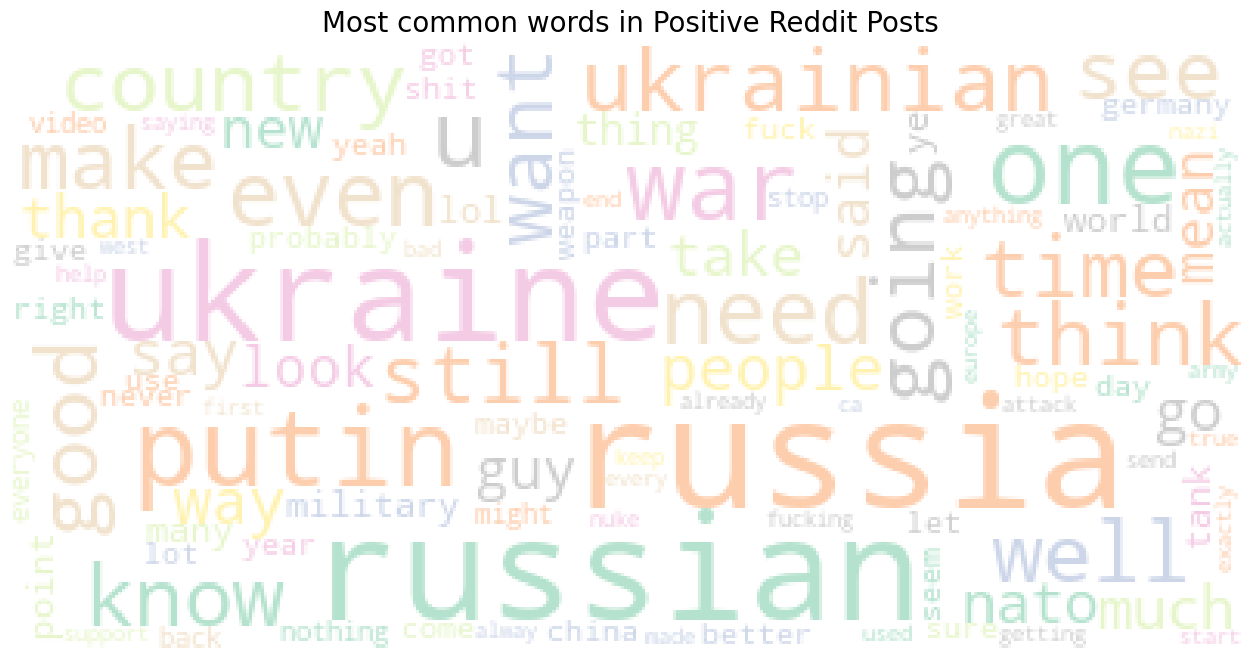

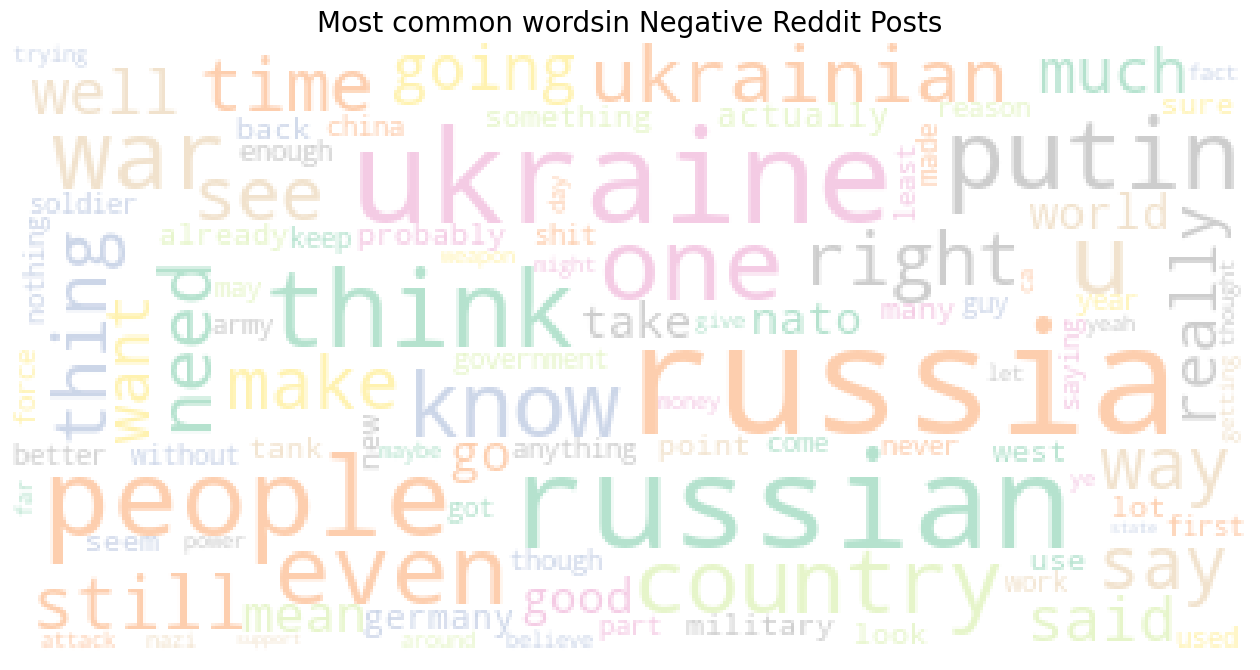

In [190]:
# 1. Reddit - Kaggle Data - Positive: 
word_cloud = " ".join(positive_red['pre-processed text'].values)
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words in Positive Reddit Posts", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

# 2. Reddit - Kaggle Data - Negative
word_cloud = " ".join(negative_red['pre-processed text'].values)
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words in Negative Reddit Posts", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

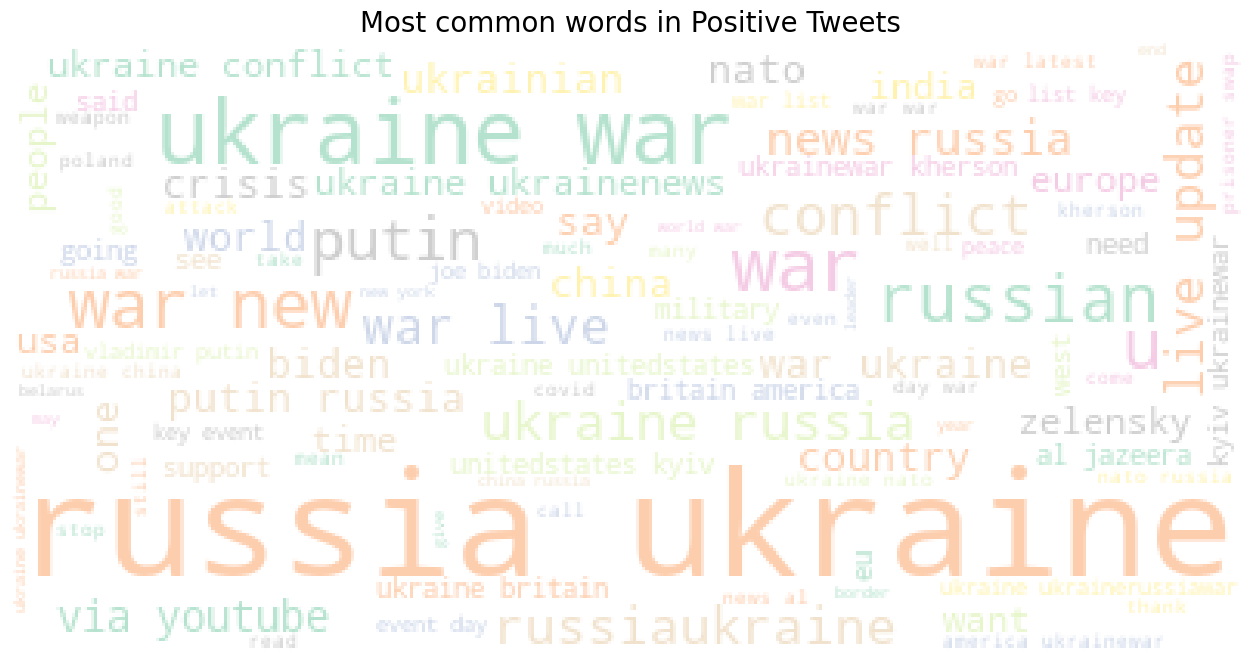

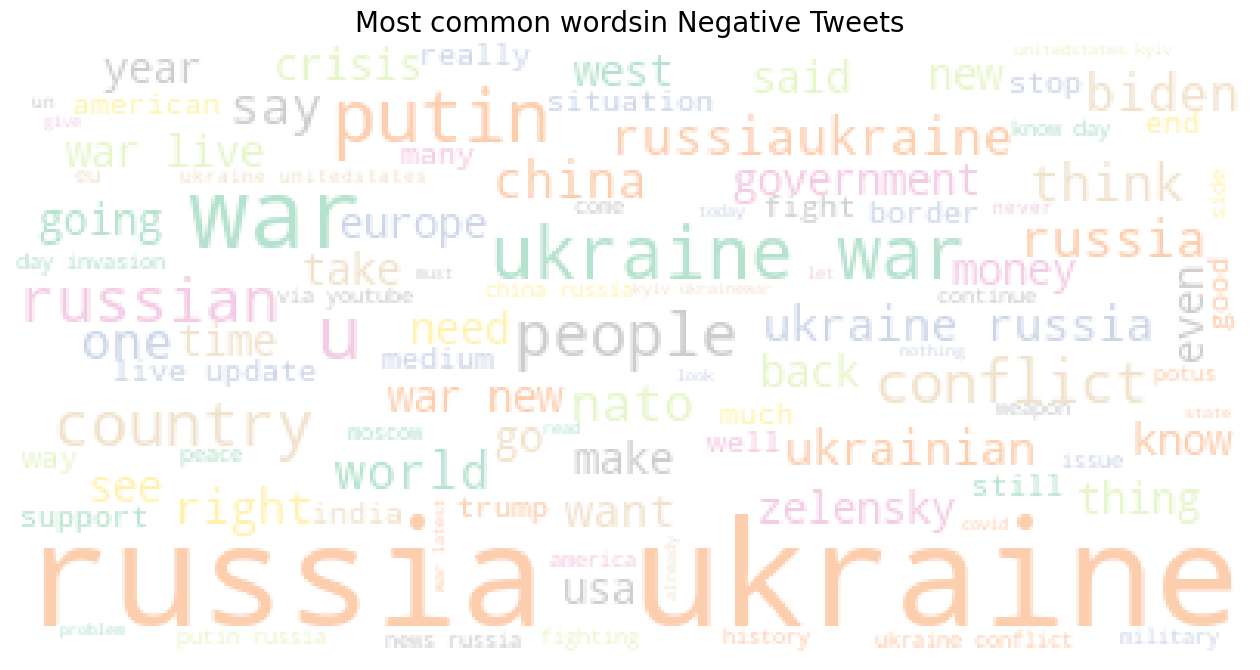

In [191]:
# 3. Twitter Data - Positive: 
word_cloud = " ".join(positive_twi['pre-processed text'].values)
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words in Positive Tweets", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

# 4. Twitter Data - Negative
word_cloud = " ".join(negative_twi['pre-processed text'].values)
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words in Negative Tweets", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

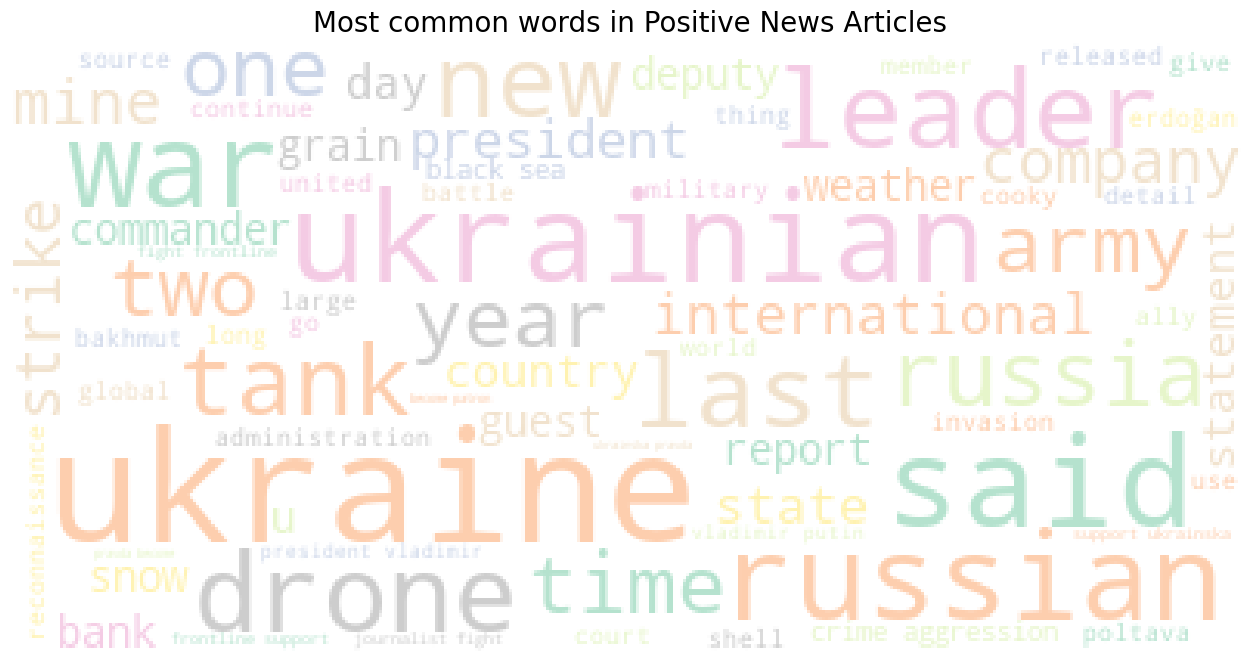

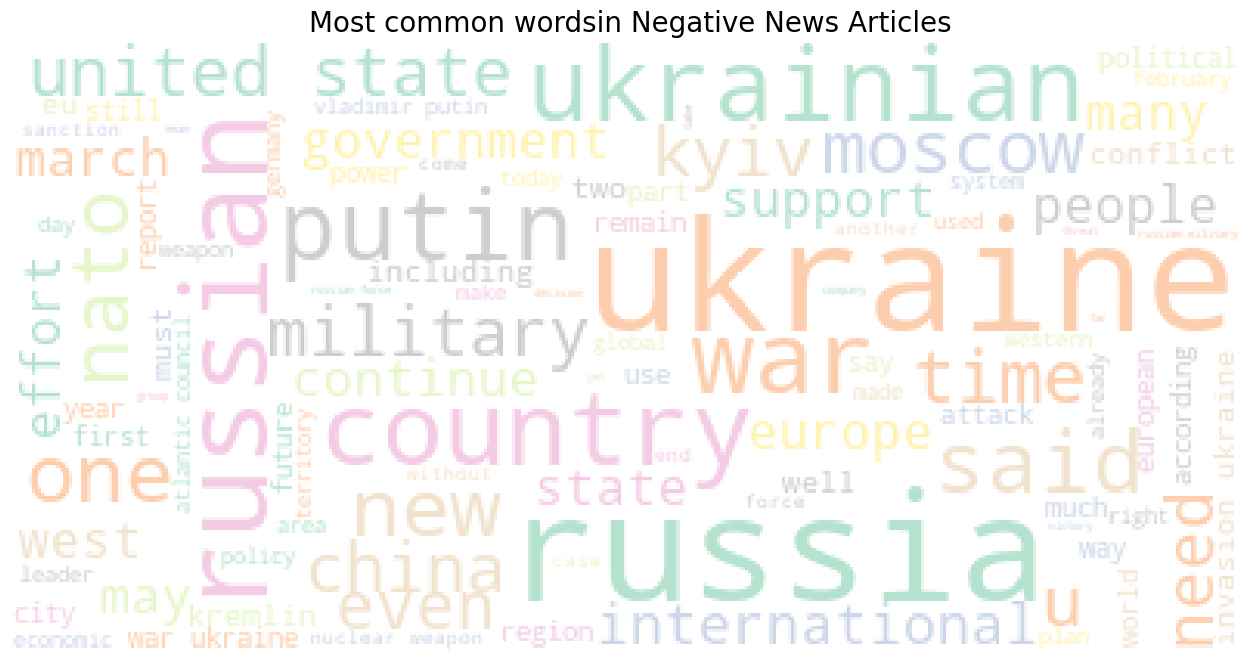

In [192]:
# 5. News Articles Data - Positive: 
word_cloud = " ".join(positive_news['pre-processed text'].values)
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words in Positive News Articles", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

# 6. News Articles Data - Negative
word_cloud = " ".join(negative_news['pre-processed text'].values)
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words in Negative News Articles", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')